# Arc Clamp Design
Document containing the design information for the PSAS arc clamp system.

## Notional Design and Free Body Diagram

<img src="notional_drawing.png" width=700 />

### Clamping Force from the Screws

$$F_{sc} = \frac{\Gamma N_{sc}}{KD} $$

### Forces on Arc Clamp

$$\Sigma F_{x} = 0 = -F_{sc} + 2F_{\mu co}\cos(\theta) + 2F_{co}\sin(\theta)$$

$$F_{sc} = 2\mu_{co}F_{co}\cos(\theta) + 2F_{co}\sin(\theta)$$

$$F_{sc} = 2F_{co}(\mu_{co}\cos(\theta) + sin(\theta))$$

### Forces on Ring

$$\Sigma F_{y} = 0 = F_{clamp} +F_{\mu co}\sin(\theta) - F_{co}\cos(\theta)$$

$$F_{clamp} = -\mu_{co}F_{co}\sin(\theta) + F_{co}\cos(\theta)$$

$$F_{clamp} = \frac{F_{sc}(-\mu_{co}\sin(\theta) + \cos(\theta))}{2(\mu_{co}\cos(\theta) + \sin(\theta))}$$

## Nomenclature
F<sub>sc</sub>      Screw Clamping Force  
F<sub>co</sub>      Jaw Contact Force  
F<sub>$\mu$co</sub> Jaw Friction Force  
F<sub>clamp</sub>   Clamping Force  
$\Gamma$            Screw Torque  
N<sub>sc</sub>      Number of Screws  
$\theta$            Jaw Angle    
$\mu$<sub>co</sub>  Coefficient of static friction between the jaws  
K                   Nut Factor  
D                   Screw Diameter

## Nominal Clamping Force

In [6]:
import math

gamma = 5.2                  # Screw Torque (in-lbf)
num_screws = 8               # Number of screws
theta = math.radians(20)     # Jaw Angle (radians)
mu_co = 1.05                 # Static Friction Coeff for Al-Al. Worst case, conservative.
K = 0.3                      # Conservative Value for Nut Factor
D = 0.11                     # Screw Diameter (in)

F_sc = gamma*num_screws/(K*D)
F_clamp = gamma*num_screws*(-mu_co*math.sin(theta)+ math.cos(theta))\
/(2*K*D*(mu_co*math.cos(theta)+math.sin(theta)))

print('Nominal Values per Arc Clamp:')
print('  F_sc = {:4.2f} lbf'.format(F_sc))
print('  F_clamp = {:4.2f} lbf'.format(F_clamp))

Nominal Values per Arc Clamp:
  F_sc = 1260.61 lbf
  F_clamp = 275.41 lbf


## Jaw Angle Parametric Study
Parametric study based on common end mill taper angles. Data compiled from McMaster Carr
https://www.mcmaster.com/catalog/127/2694

(0, 0.13)

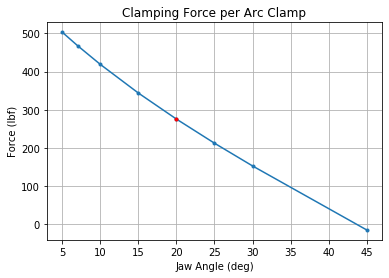

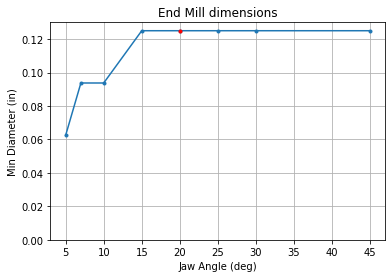

In [5]:
import matplotlib.pyplot as plt

theta_degs = [5,7,10,15,20,25,30,45]  # Common end mill taper angles
mill_diam_min = [1/16,3/32,3/32,1/8,1/8,1/8,1/8,1/8]
results = []
for theta_deg in theta_degs:
    theta = math.radians(theta_deg)     # Jaw Angle (radians)
    F = gamma*num_screws*(-mu_co*math.sin(theta)+ math.cos(theta))/(2*K*D*(mu_co*math.cos(theta)+math.sin(theta)))
    results.append(F)
    
f_clamp_plot = plt.figure(1)
plt.title('Clamping Force per Arc Clamp')
plt.grid()
plt.plot(theta_degs,results,'.-')
plt.plot(20,F_clamp,'r.') # Current Value
plt.xlabel('Jaw Angle (deg)')
plt.ylabel('Force (lbf)')

end_mill_plot = plt.figure(2)
plt.title('End Mill dimensions')
plt.grid()
plt.plot(theta_degs,mill_diam_min,'.-')
plt.plot(20,1/8,'r.') # Current Value
plt.xlabel('Jaw Angle (deg)')
plt.ylabel('Min Diameter (in)')
plt.ylim([0,0.13])

## Loading

$$N_{x} = \frac{F}{2\pi R} + \frac{M}{\pi R^{2}}\cos(\phi)$$

$N_x$ Axial load per inch  
$\phi$ Angle around the cylinder

In [3]:
import math

# Inputs
F = 1.573 # Klbf ~7000 N
M = 0.265 # K in = 30 Nm
R = 6     # in

Nx_max = 1000*(F/(2*math.pi*R) + M/(math.pi*R**2))
print('Nx_max {:3.2f} lbf/in'.format(Nx_max))

Nx_max 44.07 lbf/in
